## Albert Kabore

### Project Title: GHW Heart Failure Readmission Prediction


### Introduction

The growing burden of hospital readmissions, especially among heart failure patients, presents a critical challenge for healthcare systems. High readmission rates contribute to increased healthcare costs, strained resources, and poorer patient outcomes. In response, healthcare providers are turning to data-driven solutions to proactively identify at-risk patients and improve post-discharge care.

This project, titled GHW Heart Failure Readmission Prediction, aims to leverage real-world patient data to predict the likelihood of readmission within 30 or 60 days after discharge. The dataset—sourced from Kaggle—comprises diverse information, including demographics (age, gender, race), medical history (chronic illnesses, comorbidities), lab results (creatinine, sodium, hemoglobin), vitals (blood pressure, heart rate), and hospitalization records (length of stay, discharge type, previous admissions).

The core objective is to build and evaluate machine learning models that can accurately identify patients at high risk of readmission. In doing so, the project not only demonstrates predictive modeling techniques but also offers clinical insights that can support healthcare professionals in making informed decisions to reduce preventable readmissions and enhance patient care.

In [137]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [138]:
!pip install --upgrade -q threadpoolctl


In [139]:
!pip install jinja2


In [140]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


Importing necessary libraries


In [141]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations (again for consistency)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [142]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Exploratory Data Analysis (EDA)

### Loading the dataset


In [143]:
df = pd.read_csv("GHW_HeartFailure_Readmission_Combined.csv")


### Data Overview


Checking the shape of the dataset


In [144]:
print(df.shape)


(1000, 22)


### Displaying the first few rows of the dataset


In [145]:
# let's view the first 5 rows of the data

display(df.head())

,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days,Readmission_30or60Days
0,1,83,Male,Other,7,4,Rehab,119,37.100,147,160,99,27,11,0.610,127,13.100,2973,39,0,0,0
1,2,73,Female,Hispanic,10,2,Home,107,38.400,54,151,75,13,15,1.480,145,11.400,3220,56,0,0,0
2,3,59,Female,White,5,1,Expired,63,39.000,118,112,57,21,26,1.540,147,10.900,1190,50,0,0,0
3,4,87,Female,White,8,3,Expired,86,39.200,80,135,55,27,34,1.630,133,10.100,2934,29,1,1,1
4,5,52,Female,Asian,1,1,Home,117,38.500,94,145,79,16,32,2.570,146,12.800,4324,37,0,0,0


### Checking the data types of the columns for the dataset


In [146]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1000 non-null   int64  
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Ethnicity               1000 non-null   object 
 4   Length_of_Stay          1000 non-null   int64  
 5   Previous_Admissions     1000 non-null   int64  
 6   Discharge_Disposition   1000 non-null   object 
 7   Pulse                   1000 non-null   int64  
 8   Temperature             1000 non-null   float64
 9   Heart_Rate              1000 non-null   int64  
 10  Systolic_BP             1000 non-null   int64  
 11  Diastolic_BP            1000 non-null   int64  
 12  Respiratory_Rate        1000 non-null   int64  
 13  BUN                     1000 non-null   int64  
 14  Creatinine              1000 non-null   f

### Checking for duplicate values


In [147]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")



Duplicate rows: 0


### Checking for missing values


In [148]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nMissing values:")
print(missing if not missing.empty else " No missing values")


Missing values:
 No missing values


In [149]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Patient_ID               0.000
Age                      0.000
Gender                   0.000
Ethnicity                0.000
Length_of_Stay           0.000
Previous_Admissions      0.000
Discharge_Disposition    0.000
Pulse                    0.000
Temperature              0.000
Heart_Rate               0.000
Systolic_BP              0.000
Diastolic_BP             0.000
Respiratory_Rate         0.000
BUN                      0.000
Creatinine               0.000
Sodium                   0.000
Hemoglobin               0.000
NT_proBNP                0.000
Ejection_Fraction        0.000
Readmission_30Days       0.000
Readmission_60Days       0.000
Readmission_30or60Days   0.000
dtype: float64

In [150]:
# Heuristics to find a binary readmission target column
candidates = [c for c in df.columns if any(key in c.lower() for key in ["readmit", "readmission", "readm", "target", "label"])]
target_col = None
for c in candidates:
    # consider columns with <= 3 unique non-null values as binary-like
    nun = df[c].dropna().nunique()
    if nun <= 3:
        target_col = c
        break

# Fallbacks if heuristic did not find a target
if target_col is None:
    if "Readmitted" in df.columns:
        target_col = "Readmitted"
    elif "readmitted" in df.columns:
        target_col = "readmitted"
    elif "Readmission" in df.columns:
        target_col = "Readmission"
    else:
        # choose the last column as a last resort
        target_col = df.columns[-1]



## Display a screenshot showing your target y histogram:

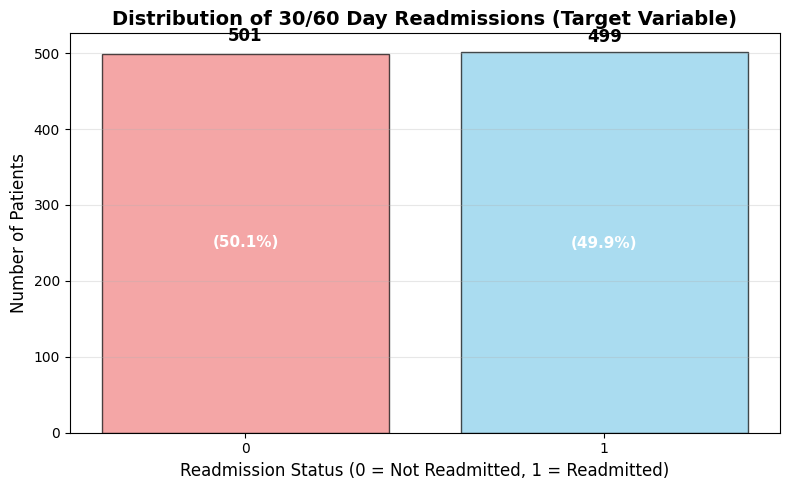

Class distribution:
Not Readmitted (0): 499 patients (49.9%)
Readmitted (1): 501 patients (50.1%)
Total patients: 1000


In [151]:
# Create the target variable histogram with correct column name
plt.figure(figsize=(8, 5))
target_counts = df['Readmission_30or60Days'].value_counts()
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
plt.title('Distribution of 30/60 Day Readmissions (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Readmission Status (0 = Not Readmitted, 1 = Readmitted)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add percentage labels
total = len(df)
percentages = [f'({count/total*100:.1f}%)' for count in target_counts.values]
for i, percentage in enumerate(percentages):
    plt.text(i, target_counts.values[i]//2, percentage, ha='center', va='center', fontsize=11, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class distribution:")
print(f"Not Readmitted (0): {target_counts[0]} patients ({target_counts[0]/total*100:.1f}%)")
print(f"Readmitted (1): {target_counts[1]} patients ({target_counts[1]/total*100:.1f}%)")
print(f"Total patients: {total}")

## Display a screenshot showing your target x histogram(s):



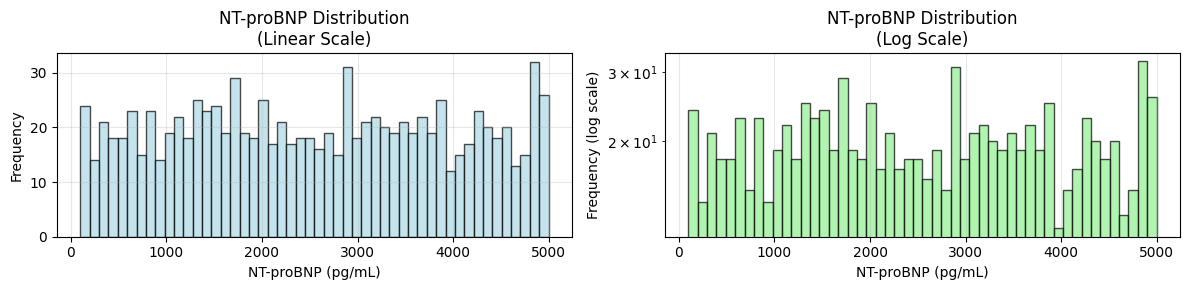

NT-proBNP Statistics:
count   1000.000
mean    2552.547
std     1416.044
min      100.000
25%     1352.750
50%     2546.000
75%     3747.250
max     4997.000
Name: NT_proBNP, dtype: float64

Patients with NT-proBNP > 1000 pg/mL: 829 (82.9%)
Patients with NT-proBNP > 5000 pg/mL: 0 (0.0%)


In [152]:
# Plot NT_proBNP distribution
plt.figure(figsize=(12, 3))

# Histogram with log scale to better visualize the distribution
plt.subplot(1, 2, 1)
plt.hist(df['NT_proBNP'], bins=50, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('NT-proBNP Distribution\n(Linear Scale)', fontsize=12)
plt.xlabel('NT-proBNP (pg/mL)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['NT_proBNP'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
plt.yscale('log')
plt.title('NT-proBNP Distribution\n(Log Scale)', fontsize=12)
plt.xlabel('NT-proBNP (pg/mL)', fontsize=10)
plt.ylabel('Frequency (log scale)', fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("NT-proBNP Statistics:")
print(df['NT_proBNP'].describe())
print(f"\nPatients with NT-proBNP > 1000 pg/mL: {len(df[df['NT_proBNP'] > 1000])} ({len(df[df['NT_proBNP'] > 1000])/len(df)*100:.1f}%)")
print(f"Patients with NT-proBNP > 5000 pg/mL: {len(df[df['NT_proBNP'] > 5000])} ({len(df[df['NT_proBNP'] > 5000])/len(df)*100:.1f}%)")

NT-proBNP Risk Category Distribution:
High_Risk: 829 patients (82.9%), Readmission rate: 50.8%
Intermediate_Risk: 132 patients (13.2%), Readmission rate: 47.0%
Low_Risk: 39 patients (3.9%), Readmission rate: 46.2%


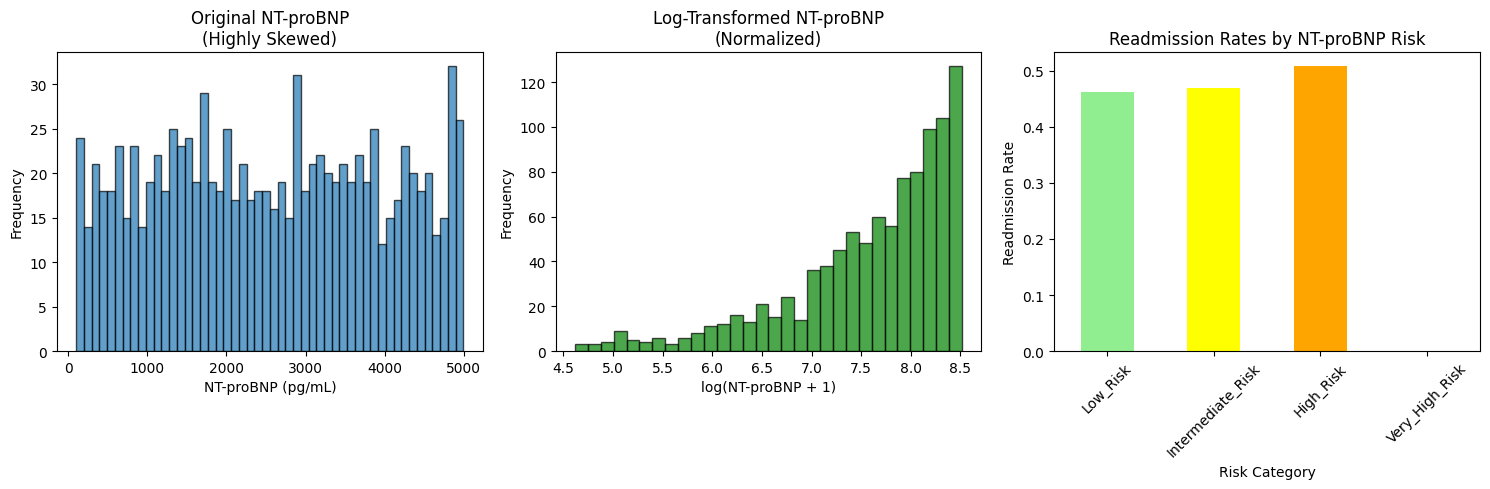

In [153]:

# Apply logarithmic transformation to handle skewness
df['NT_proBNP_log'] = np.log1p(df['NT_proBNP'])  # log1p handles zero values

# Create risk categories based on clinical thresholds
def categorize_nt_probnp_risk(nt_probnp):
    if nt_probnp < 300:
        return 'Low_Risk'
    elif nt_probnp < 1000:
        return 'Intermediate_Risk'
    elif nt_probnp < 5000:
        return 'High_Risk'
    else:
        return 'Very_High_Risk'

df['NT_proBNP_Risk_Category'] = df['NT_proBNP'].apply(categorize_nt_probnp_risk)

# Verify the transformation
print("NT-proBNP Risk Category Distribution:")
risk_counts = df['NT_proBNP_Risk_Category'].value_counts()
for risk_category in risk_counts.index:
    count = risk_counts[risk_category]
    readmission_rate = df[df['NT_proBNP_Risk_Category'] == risk_category]['Readmission_30or60Days'].mean() * 100
    print(f"{risk_category}: {count} patients ({count/len(df)*100:.1f}%), Readmission rate: {readmission_rate:.1f}%")

# Visualize before and after transformation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['NT_proBNP'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Original NT-proBNP\n(Highly Skewed)', fontsize=12)
plt.xlabel('NT-proBNP (pg/mL)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['NT_proBNP_log'], bins=30, edgecolor='black', alpha=0.7, color='green')
plt.title('Log-Transformed NT-proBNP\n(Normalized)', fontsize=12)
plt.xlabel('log(NT-proBNP + 1)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
risk_order = ['Low_Risk', 'Intermediate_Risk', 'High_Risk', 'Very_High_Risk']
readmission_by_risk = df.groupby('NT_proBNP_Risk_Category')['Readmission_30or60Days'].mean().reindex(risk_order)
readmission_by_risk.plot(kind='bar', color=['lightgreen', 'yellow', 'orange', 'red'])
plt.title('Readmission Rates by NT-proBNP Risk', fontsize=12)
plt.xlabel('Risk Category')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()